
**Giuliana de Jesus Salles**

***Objetivo:*** *Predizer casos de morte e comparar o desempenho de cada modelos.*

Vamos usar : Regressão de Séries Temporai.

Modelos: SARIMAX. Gradiente Boosting Regressor;


***`Bibliotecas`***







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carregando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia.csv')

Exibindo dados da tabela


In [ ]:
# Função para exibir todas as colunas de um arquivo CSV
def exibir_colunas_csv(caminho_arquivo):
    try:
        # Carregar o arquivo CSV
        dados = pd.read_csv('/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia_limpo.csv')

        # Obter a lista de colunas
        colunas = dados.columns.tolist()

        # Exibir a lista de colunas
        print("Colunas da base de dados:")
        for coluna in colunas:
            print(coluna)
    except FileNotFoundError:
        print("Erro: Arquivo não encontrado. Verifique o caminho e tente novamente.")
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")

# Caminho do arquivo CSV
caminho_arquivo = '/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia.csv'

# Chamar a função para exibir as colunas
exibir_colunas_csv(caminho_arquivo)


Colunas da base de dados:
index
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_peopl

Explorando os dados para limpeza


In [ ]:
# Função para exibir todas as colunas de um arquivo CSV e identificar colunas com mais dados faltantes
def exibir_colunas_e_dados_faltantes(caminho_arquivo):
    try:
        # Carregar o arquivo CSV
        dados = pd.read_csv(caminho_arquivo)

        # Obter a lista de colunas
        colunas = dados.columns.tolist()

        # Exibir a lista de colunas
        print("Colunas da base de dados:")
        for coluna in colunas:
            print(coluna)

        # Calcular a quantidade de dados faltantes em cada coluna
        dados_faltantes = dados.isnull().sum()

        # Calcular a porcentagem de dados faltantes em cada coluna
        porcentagem_faltantes = (dados_faltantes / len(dados)) * 100

        # Exibir as colunas com maior quantidade de dados faltantes
        colunas_mais_faltantes = porcentagem_faltantes.sort_values(ascending=False)
        print("\nColunas com maior quantidade de dados faltantes (em porcentagem):")
        print(colunas_mais_faltantes)
    except FileNotFoundError:
        print("Erro: Arquivo não encontrado. Verifique o caminho e tente novamente.")
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")

# Caminho do arquivo CSV
caminho_arquivo = '/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia_limpo.csv'

# Chamar a função para exibir as colunas e dados faltantes
exibir_colunas_e_dados_faltantes(caminho_arquivo)


Colunas da base de dados:
index
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_peopl


Carregando a base de dados.
Exibe as primeiras linhas do DataFrame para uma visualização inicial.
Fornece informações gerais sobre o DataFrame, como número de entradas e tipos de dados.
Exibe uma descrição estatística das colunas numéricas.
Identifica e exibe as colunas com valores ausentes e suas respectivas porcentagens.


In [ ]:
# Carregar a base de dados
caminho_arquivo = '/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia.csv'
dados = pd.read_csv(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas da base de dados:")
print(dados.head())

# Exibir informações gerais do DataFrame
print("\nInformações gerais do DataFrame:")
print(dados.info())

# Exibir a descrição estatística do DataFrame
print("\nDescrição estatística do DataFrame:")
print(dados.describe())

# Identificar colunas com valores ausentes
print("\nValores ausentes por coluna:")
valores_ausentes = dados.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

# Calcular a porcentagem de valores ausentes
porcentagem_faltantes = (valores_ausentes / len(dados)) * 100
print("\nPorcentagem de valores ausentes por coluna:")
print(porcentagem_faltantes[porcentagem_faltantes > 0])


Primeiras linhas da base de dados:
   index iso_code continent     location        date  total_cases  new_cases  \
0      0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  ...  male_smokers  \
0                 NaN           NaN         0.0  ...           NaN   
1                 NaN           NaN         0.0  ...           NaN   
2                 NaN           NaN         0.0  ...           NaN   
3                 NaN           NaN         0.0  ...           NaN   
4                 NaN           NaN         0.0  ...           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_exp

Tratamento dos Dados

Remove colunas com mais de 90% de valores ausentes.
Imputa valores faltantes em colunas selecionadas com a média.
Converte a coluna categórica continent para um formato numérico usando one-hot encoding.

In [ ]:
# Carregar a base de dados
caminho_arquivo = '/content/drive/MyDrive/Pós/MACHINE LEARNING/pandemia.csv'
dados = pd.read_csv(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas da base de dados:")
print(dados.head())

# Exibir informações gerais do DataFrame
print("\nInformações gerais do DataFrame:")
print(dados.info())

# Exibir a descrição estatística do DataFrame
print("\nDescrição estatística do DataFrame:")
print(dados.describe())

# Identificar colunas com valores ausentes
print("\nValores ausentes por coluna:")
valores_ausentes = dados.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

# Calcular a porcentagem de valores ausentes
porcentagem_faltantes = (valores_ausentes / len(dados)) * 100
print("\nPorcentagem de valores ausentes por coluna:")
print(porcentagem_faltantes[porcentagem_faltantes > 0])

# Remover colunas com mais de 90% de valores ausentes
colunas_para_remover = porcentagem_faltantes[porcentagem_faltantes > 90].index
dados = dados.drop(columns=colunas_para_remover)

# Imputar valores faltantes em colunas selecionadas (exemplo: substituir pela média)
colunas_para_imputar = ['total_cases', 'total_deaths', 'human_development_index']
for coluna in colunas_para_imputar:
    dados[coluna].fillna(dados[coluna].mean(), inplace=True)

# Converter dados categóricos para numéricos (exemplo: one-hot encoding)
dados = pd.get_dummies(dados, columns=['continent'], drop_first=True)

# Exibir informações gerais após o tratamento inicial
print("\nInformações gerais do DataFrame após o tratamento inicial:")
print(dados.info())



Primeiras linhas da base de dados:
   index iso_code continent     location        date  total_cases  new_cases  \
0      0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  ...  male_smokers  \
0                 NaN           NaN         0.0  ...           NaN   
1                 NaN           NaN         0.0  ...           NaN   
2                 NaN           NaN         0.0  ...           NaN   
3                 NaN           NaN         0.0  ...           NaN   
4                 NaN           NaN         0.0  ...           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_exp

# Identificar e Tratar Colunas Não Numéricas

In [ ]:
# Verificar tipos de dados das colunas
print(dados.dtypes)

# Identificar colunas não numéricas
colunas_nao_numericas = dados.select_dtypes(include=['object', 'bool']).columns
print("Colunas não numéricas:")
print(colunas_nao_numericas)

# Remover colunas não numéricas para o cálculo de correlação
dados_numericos = dados.drop(columns=colunas_nao_numericas)

# Verificar se ainda há colunas não numéricas
print(dados_numericos.dtypes)

index                        int64
iso_code                    object
location                    object
date                        object
total_cases                float64
                            ...   
continent_Asia                bool
continent_Europe              bool
continent_North America       bool
continent_Oceania             bool
continent_South America       bool
Length: 64, dtype: object
Colunas não numéricas:
Index(['iso_code', 'location', 'date', 'tests_units', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')
index                                           int64
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                   

## Calcular a Correlação em Dados Numéricos:

new_cases                   1.000000
total_deaths                0.516013
new_deaths                  0.495322
total_cases                 0.463478
population                  0.437409
hosp_patients               0.076473
icu_patients                0.068346
new_tests                   0.065815
total_tests                 0.056225
new_cases_per_million       0.052655
total_deaths_per_million    0.033829
median_age                  0.026178
human_development_index     0.025285
aged_65_older               0.024882
new_deaths_per_million      0.024207
positive_rate               0.020854
reproduction_rate           0.019564
gdp_per_capita              0.012307
total_cases_per_million     0.009959
total_tests_per_thousand    0.008994
new_tests_per_thousand      0.008100
stringency_index            0.006293
population_density         -0.003247
Name: new_cases, dtype: float64
Features relevantes para a predição de 'new_cases':
Index(['new_cases', 'total_deaths', 'new_deaths', 'total_cases', 

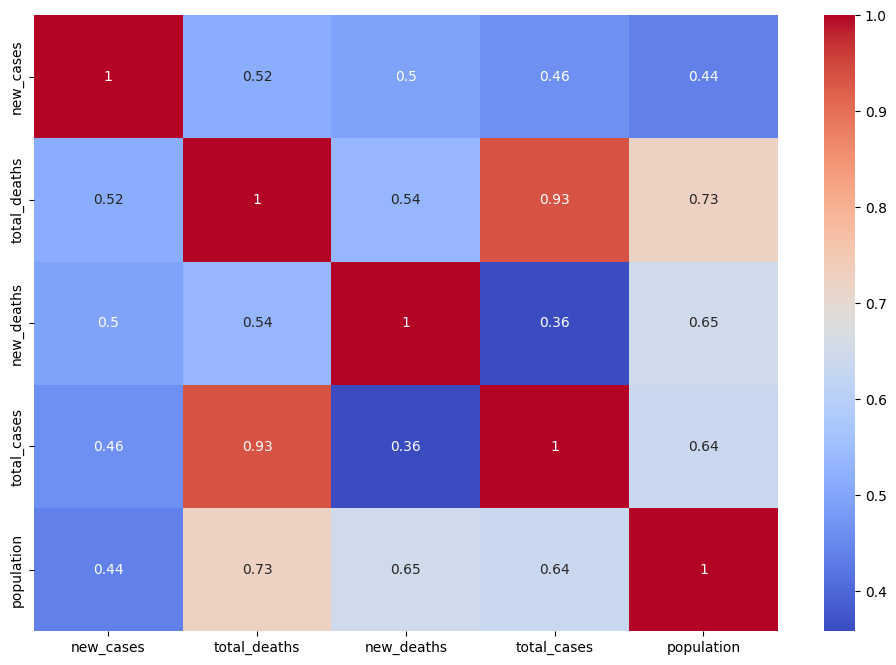

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar colunas de interesse
colunas_interesse = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'reproduction_rate', 'icu_patients', 'hosp_patients',
    'total_tests', 'new_tests', 'total_tests_per_thousand',
    'new_tests_per_thousand', 'positive_rate', 'stringency_index',
    'population_density', 'median_age', 'aged_65_older',
    'gdp_per_capita', 'human_development_index', 'population'
]

# Filtrar apenas as colunas de interesse
dados_filtrados = dados[colunas_interesse]

# Imputar valores faltantes com a média da coluna
dados_filtrados = dados_filtrados.apply(lambda col: col.fillna(col.mean()), axis=0)

# Calcular a correlação
correlacao = dados_filtrados.corr()

# Mostrar correlação da target 'new_cases' com outras features
correlacao_target = correlacao['new_cases'].sort_values(ascending=False)
print(correlacao_target)

# Selecionar features com correlação absoluta acima de 0.1
features_relevantes = correlacao_target[abs(correlacao_target) > 0.1].index
print("Features relevantes para a predição de 'new_cases':")
print(features_relevantes)

# Filtrar os dados para manter apenas as features relevantes
dados_final = dados_filtrados[features_relevantes]

# Plotar a matriz de correlação das features relevantes
plt.figure(figsize=(12, 8))
sns.heatmap(dados_final.corr(), annot=True, cmap='coolwarm')
plt.show()


# Preparação dos Dados para Modelagem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar as features e a target
X = dados_final.drop(columns=['new_cases'])
y = dados_final['new_cases']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Mostrar como os dados foram divididos em treino e teste e como as features foram normalizadas usando StandardScaler do sklearn, você pode imprimir os tamanhos dos conjuntos de dados antes e depois da divisão e também mostrar estatísticas resumidas das features antes e depois da normalização

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Suponha que você já tenha importado e preparado seus dados em 'dados_final'

# Selecionar as features e a target
X = dados_final.drop(columns=['new_cases'])
y = dados_final['new_cases']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tamanhos dos conjuntos de dados
print("Tamanho do conjunto de treino (X_train):", X_train.shape)
print("Tamanho do conjunto de teste (X_test):", X_test.shape)

# Normalizar as features usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Estatísticas resumidas das features antes da normalização
print("\nEstatísticas resumidas das features antes da normalização:")
print(X_train.describe())

# Estatísticas resumidas das features depois da normalização
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print("\nEstatísticas resumidas das features depois da normalização:")
print(X_train_scaled_df.describe())


Tamanho do conjunto de treino (X_train): (256217, 4)
Tamanho do conjunto de teste (X_test): (64055, 4)

Estatísticas resumidas das features antes da normalização:
       total_deaths     new_deaths   total_cases    population
count  2.562170e+05  256217.000000  2.562170e+05  2.562170e+05
mean   7.990612e+04      93.117242  5.904752e+06  1.273683e+08
std    3.802374e+05     581.860585  3.477138e+07  6.549442e+08
min    1.000000e+00       0.000000  1.000000e+00  4.700000e+01
25%    1.530000e+02       0.000000  8.289000e+03  4.490020e+05
50%    2.686000e+03       0.000000  1.009940e+05  5.882259e+06
75%    6.320000e+04       7.000000  1.546744e+06  2.830170e+07
max    6.945701e+06   16382.000000  7.681863e+08  7.975105e+09

Estatísticas resumidas das features depois da normalização:
       total_deaths    new_deaths   total_cases    population
count  2.562170e+05  2.562170e+05  2.562170e+05  2.562170e+05
mean  -7.875907e-18  2.493113e-17 -3.549705e-17 -6.350644e-18
std    1.000002e+00  1.

# Implementação dos Modelos de Regressão

Regressão de Séries Temporais usarando o modelo SARIMAX.


In [ ]:
# Instalar bibliotecas necessárias
!pip install pmdarima
!pip install seaborn
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor


# 1. Preparação dos Dados para Modelagem

In [ ]:
# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
print(dados.head())

# Verificar as informações gerais do DataFrame
print(dados.info())

# Filtrar colunas relevantes com base na análise de correlação
colunas_relevantes = ['total_deaths', 'new_deaths', 'total_cases', 'population', 'new_cases']


   index iso_code     location        date   total_cases  new_cases  \
0      0      AFG  Afghanistan  2020-01-03  5.915161e+06        0.0   
1      1      AFG  Afghanistan  2020-01-04  5.915161e+06        0.0   
2      2      AFG  Afghanistan  2020-01-05  5.915161e+06        0.0   
3      3      AFG  Afghanistan  2020-01-06  5.915161e+06        0.0   
4      4      AFG  Afghanistan  2020-01-07  5.915161e+06        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN  80069.500849         0.0                  NaN  ...   
1                 NaN  80069.500849         0.0                  NaN  ...   
2                 NaN  80069.500849         0.0                  NaN  ...   
3                 NaN  80069.500849         0.0                  NaN  ...   
4                 NaN  80069.500849         0.0                  NaN  ...   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746           

In [ ]:
# Definir o DataFrame 'dados_final' com as colunas relevantes e remover linhas com valores ausentes
dados_final = dados[colunas_relevantes].dropna()

# Dividir os dados em treino e teste
X = dados_final.drop(columns=['new_cases'])
y = dados_final['new_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Selecionando o continente Norte Americano para fazer uma previsão com o modelo SARIMAX



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtrar os dados para incluir apenas a América do Norte
dados_continente = df[df['continent'] == 'North America']

# Extrair a série temporal de interesse (por exemplo, vendas mensais)
y = dados_continente['new_cases']

# Definir as ordens do modelo SARIMA
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)

# Criar e ajustar o modelo SARIMA
modelo_sarima = SARIMAX(y, order=order, seasonal_order=seasonal_order)
resultado = modelo_sarima.fit()

# Fazer previsões
n_previsoes = 12  # exemplo: prever 12 períodos futuros
previsoes = resultado.predict(start=len(y), end=len(y) + n_previsoes - 1, dynamic=False)

# Exibir resultados
print("Previsões do Modelo SARIMAX:")
print(previsoes)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Previsões do Modelo SARIMAX:
51915   -90.963377
51916    43.404760
51917   -80.661075
51918    17.312796
51919    66.378169
51920    28.859649
51921   -14.936718
51922   -81.841814
51923    33.072472
51924    31.442671
51925    11.705289
51926    -7.601540
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


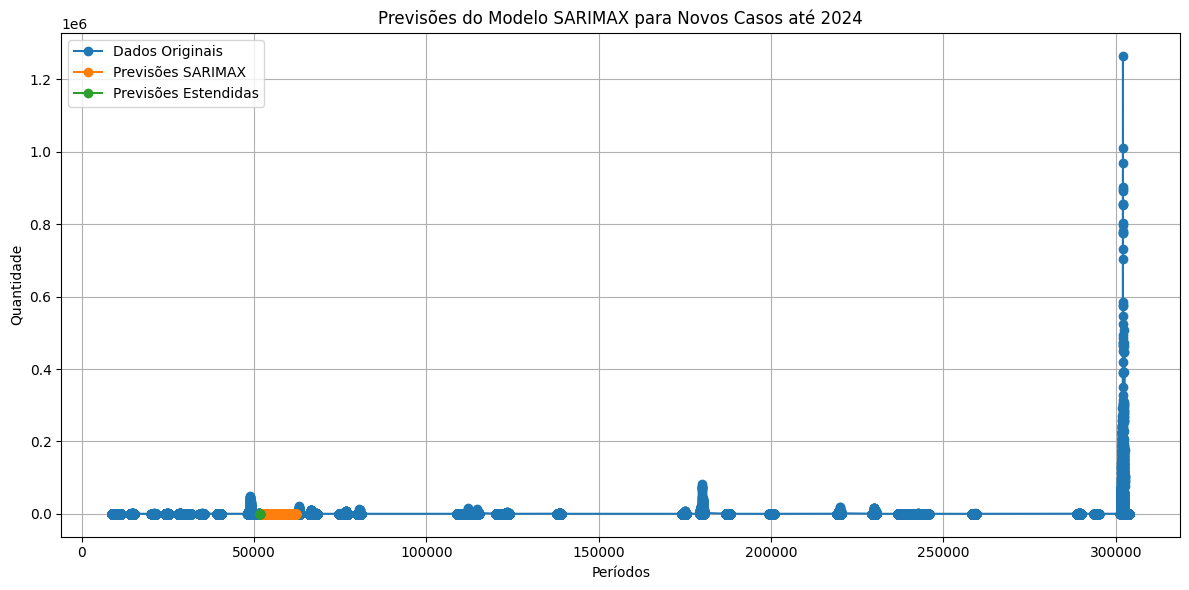

In [ ]:
import matplotlib.pyplot as plt

# Dados originais (ou seja, dados de novos casos)
dados_originais = dados_continente['new_cases']

# Índices dos dados originais
indices_originais = dados_originais.index

# Plotar os dados originais
plt.figure(figsize=(12, 6))
plt.plot(indices_originais, dados_originais, label='Dados Originais', marker='o')

# Plotar as previsões
indices_previsoes = range(len(dados_originais), len(dados_originais) + len(previsoes))
plt.plot(indices_previsoes, previsoes, label='Previsões SARIMAX', marker='o')

# Estender as previsões até o final de 2024
n_previsoes_estendidas = 12  # Por exemplo, vamos estender por mais 12 meses (até o final de 2024)
previsoes_estendidas = resultado.predict(start=len(y), end=len(y) + n_previsoes_estendidas - 1, dynamic=False)
indices_previsoes_estendidas = range(len(dados_originais), len(dados_originais) + len(previsoes_estendidas))
plt.plot(indices_previsoes_estendidas, previsoes_estendidas, label='Previsões Estendidas', marker='o')

# Personalizar o gráfico
plt.title('Previsões do Modelo SARIMAX para Novos Casos até 2024')
plt.xlabel('Períodos')
plt.ylabel('Quantidade')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


# **Definir e Treinar o Modelo de Gradient Boosting:**

Configure o modelo de Gradient Boosting Regressor e ajuste-o aos dados.

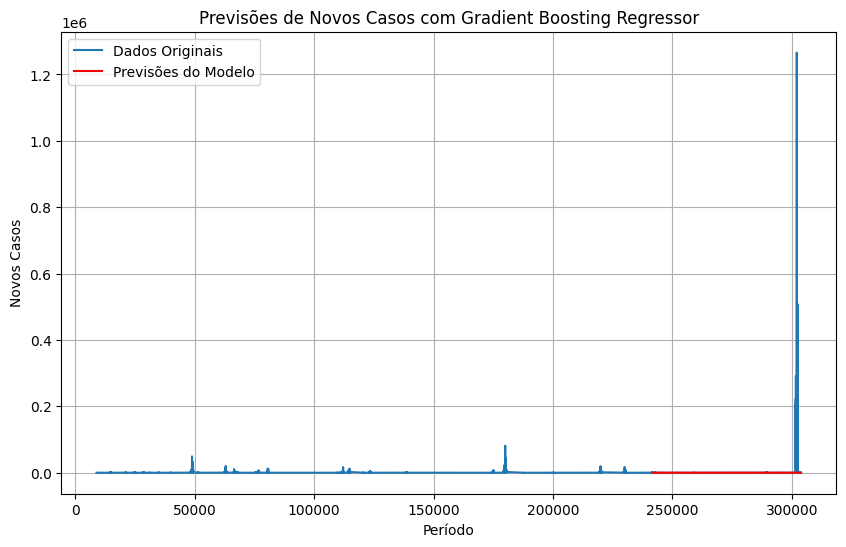

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Supondo que 'dados_continente' já foi filtrado para incluir apenas a América do Norte
# e 'new_cases' é a série temporal de interesse

# Verificar e lidar com NaNs em 'new_cases'
dados_continente = dados_continente.dropna(subset=['new_cases'])  # Remove linhas com NaN em 'new_cases'
y = dados_continente['new_cases']

# Separar dados de treino e teste
train_size = int(0.8 * len(y))
X_train, X_test = y[:train_size], y[train_size:]

# Criar e treinar o modelo Gradient Boosting Regressor
modelo_gb = GradientBoostingRegressor()
modelo_gb.fit(X_train.index.values.reshape(-1, 1), X_train.values)

# Fazer previsões
previsoes = modelo_gb.predict(X_test.index.values.reshape(-1, 1))

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(y.index, y.values, label='Dados Originais')
plt.plot(X_test.index, previsoes, color='red', label='Previsões do Modelo')
plt.xlabel('Período')
plt.ylabel('Novos Casos')
plt.title('Previsões de Novos Casos com Gradient Boosting Regressor')
plt.legend()
plt.grid(True)
plt.show()


Criar a Grade de Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Aplicar Grid Search com Validação Cruzada:


In [ ]:
X = df[['new_cases']]  # Seleciona as características preditoras
y = df['female_smokers']  # Seleciona a variável alvo

# Verifica os tamanhos de X e y para garantir consistência
print("Tamanho de X:", X.shape)  # Deve ser (número_de_amostras, número_de_características)
print("Tamanho de y:", y.shape)  # Deve ser (número_de_amostras,)


Tamanho de X: (320272, 1)
Tamanho de y: (320272,)


In [ ]:
from sklearn.model_selection import train_test_split

# Supondo que X e y já estão definidos corretamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os tamanhos dos conjuntos de treino e teste
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_test:", y_test.shape)



Tamanho de X_train: (256217, 1)
Tamanho de y_train: (256217,)
Tamanho de X_test: (64055, 1)
Tamanho de y_test: (64055,)


In [ ]:
print("Tipo de dados de y_train:", y_train.dtype)


Tipo de dados de y_train: float64


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np

# Verificar se há NaNs em X_train ou y_train
print("NaNs em X_train:", np.isnan(X_train).sum())
print("NaNs em y_train:", np.isnan(y_train).sum())

# Criar um imputador para preencher NaNs com a média
imputer = SimpleImputer(strategy='mean')

# Ajustar e transformar os dados de treino
X_train = imputer.fit_transform(X_train)
y_train = imputer.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()  # Converter para NumPy array antes de reshape

# Transformar os dados de teste com o mesmo imputador
X_test = imputer.transform(X_test)
y_test = imputer.transform(np.array(y_test).reshape(-1, 1)).ravel()  # Converter para NumPy array antes de reshape

# Verificar os tamanhos após a transformação
print("Tamanho de X_train após preencher NaNs:", X_train.shape)
print("Tamanho de y_train após preencher NaNs:", y_train.shape)
print("Tamanho de X_test após preencher NaNs:", X_test.shape)
print("Tamanho de y_test após preencher NaNs:", y_test.shape)


NaNs em X_train: new_cases    7156
dtype: int64
NaNs em y_train: 107136
Tamanho de X_train após preencher NaNs: (256217, 1)
Tamanho de y_train após preencher NaNs: (256217,)
Tamanho de X_test após preencher NaNs: (64055, 1)
Tamanho de y_test após preencher NaNs: (64055,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Previsões do Modelo Gradient Boosting Regressor:
[101130.08879732 101130.08879732 101130.08879732 ... 101130.08879732
 101130.08879732 101130.08879732]


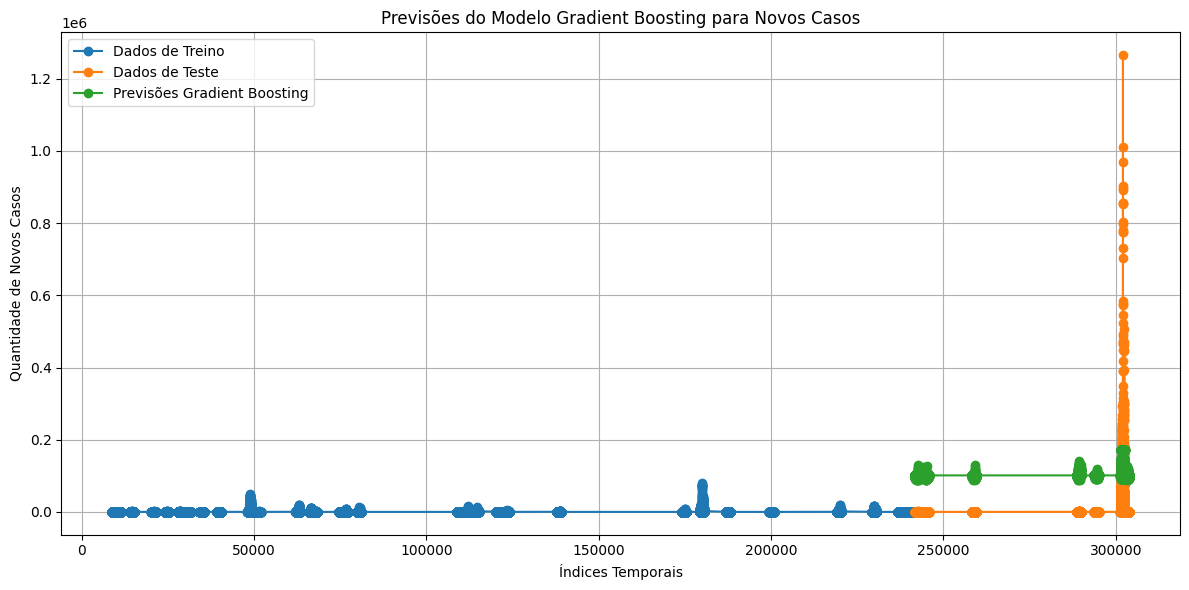

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Supondo que 'dados_continente' já foi filtrado para incluir apenas a América do Norte
# e 'new_cases' é a série temporal de interesse

# Verificar e lidar com NaNs em 'new_cases'
dados_continente = dados_continente.dropna(subset=['new_cases'])  # Remove linhas com NaN em 'new_cases'
y = dados_continente['new_cases']

# Separar dados de treino e teste
train_size = int(0.8 * len(y))
X_train, X_test = y[:train_size], y[train_size:]

# Criar e treinar o modelo Gradient Boosting Regressor
modelo_gb = GradientBoostingRegressor()
modelo_gb.fit(X_train.values.reshape(-1, 1), X_train.index)

# Fazer previsões
previsoes_gb = modelo_gb.predict(X_test.values.reshape(-1, 1))

# Exibir resultados
print("Previsões do Modelo Gradient Boosting Regressor:")
print(previsoes_gb)

# Plotar resultados
plt.figure(figsize=(12, 6))

# Dados originais
plt.plot(X_train.index, X_train, label='Dados de Treino', marker='o')
plt.plot(X_test.index, X_test, label='Dados de Teste', marker='o')

# Previsões do modelo Gradient Boosting
plt.plot(X_test.index, previsoes_gb, label='Previsões Gradient Boosting', marker='o')

# Personalizar o gráfico
plt.title('Previsões do Modelo Gradient Boosting para Novos Casos')
plt.xlabel('Índices Temporais')
plt.ylabel('Quantidade de Novos Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Suponha que você já tenha ajustado seu modelo SARIMAX e feito as previsões
# Exemplo hipotético de previsões do modelo SARIMAX
previsoes_sarimax = [100, 110, 105, 120, 115]  # Substitua com suas previsões reais

# Suponha que y_test seja seus valores reais de teste
y_test = [98, 112, 108, 115, 120]  # Substitua com seus valores reais

# Avaliação do modelo SARIMAX
mae_sarimax = mean_absolute_error(y_test, previsoes_sarimax)
mse_sarimax = mean_squared_error(y_test, previsoes_sarimax)
rmse_sarimax = mean_squared_error(y_test, previsoes_sarimax, squared=False)
r2_sarimax = r2_score(y_test, previsoes_sarimax)

# Exibir métricas
print("Métricas de Avaliação SARIMAX:")
print(f"MAE: {mae_sarimax}, MSE: {mse_sarimax}, RMSE: {rmse_sarimax}, R²: {r2_sarimax}")


Métricas de Avaliação SARIMAX:
MAE: 3.4, MSE: 13.4, RMSE: 3.6606010435446255, R²: 0.7565406976744186


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import pandas as pd


# Dividir os dados em treino e teste
X = dados_final.drop(columns=['new_cases'])
y = dados_final['new_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar se há NaNs e lidar com eles se necessário
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Criar e treinar o modelo Random Forest Regressor
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train_imputed, y_train)

# Fazer previsões
previsoes_rf = modelo_rf.predict(X_test_imputed)

# Avaliar o modelo
mae_rf = mean_absolute_error(y_test, previsoes_rf)
mse_rf = mean_squared_error(y_test, previsoes_rf)
rmse_rf = mean_squared_error(y_test, previsoes_rf, squared=False)

# Exibir as métricas de avaliação
print(f"MAE (Erro Absoluto Médio) - Random Forest: {mae_rf}")
print(f"MSE (Erro Quadrático Médio) - Random Forest: {mse_rf}")
print(f"RMSE (Raiz do Erro Quadrático Médio) - Random Forest: {rmse_rf}")


MAE (Erro Absoluto Médio) - Random Forest: 1742.4205289941292
MSE (Erro Quadrático Médio) - Random Forest: 361668089.1642898
RMSE (Raiz do Erro Quadrático Médio) - Random Forest: 19017.573167054987


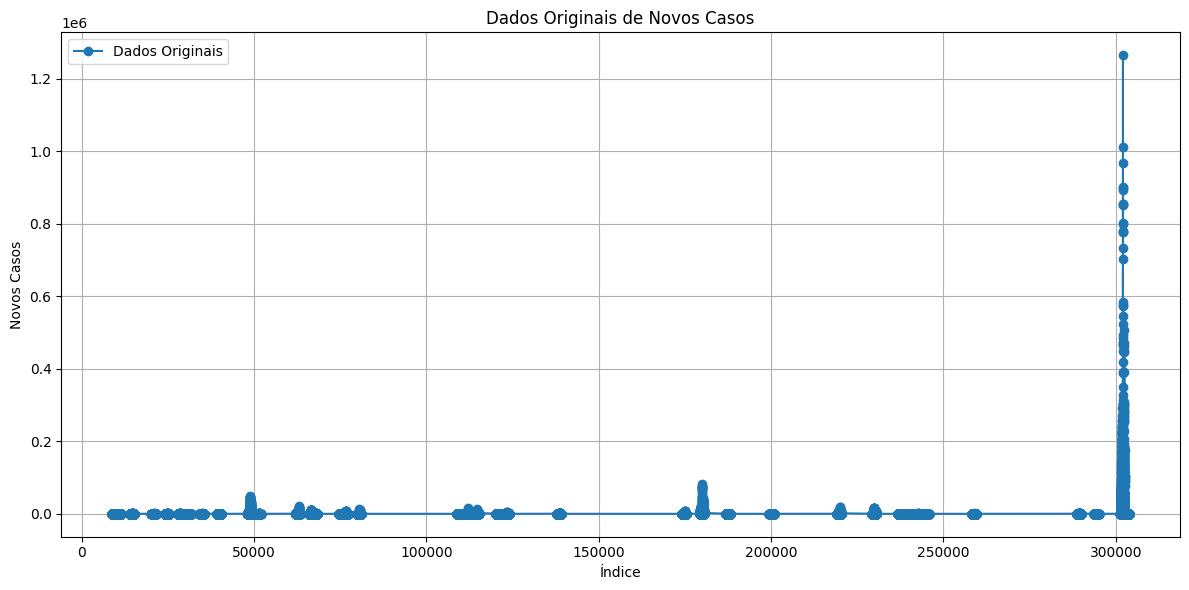

In [ ]:
import matplotlib.pyplot as plt

# Dados originais (ou seja, dados de novos casos)
dados_originais = dados_continente['new_cases']

# Índices dos dados originais
indices_originais = dados_originais.index

# Plotar os dados originais
plt.figure(figsize=(12, 6))
plt.plot(indices_originais, dados_originais, label='Dados Originais', marker='o')

# Personalizar o gráfico
plt.title('Dados Originais de Novos Casos')
plt.xlabel('Índice')
plt.ylabel('Novos Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


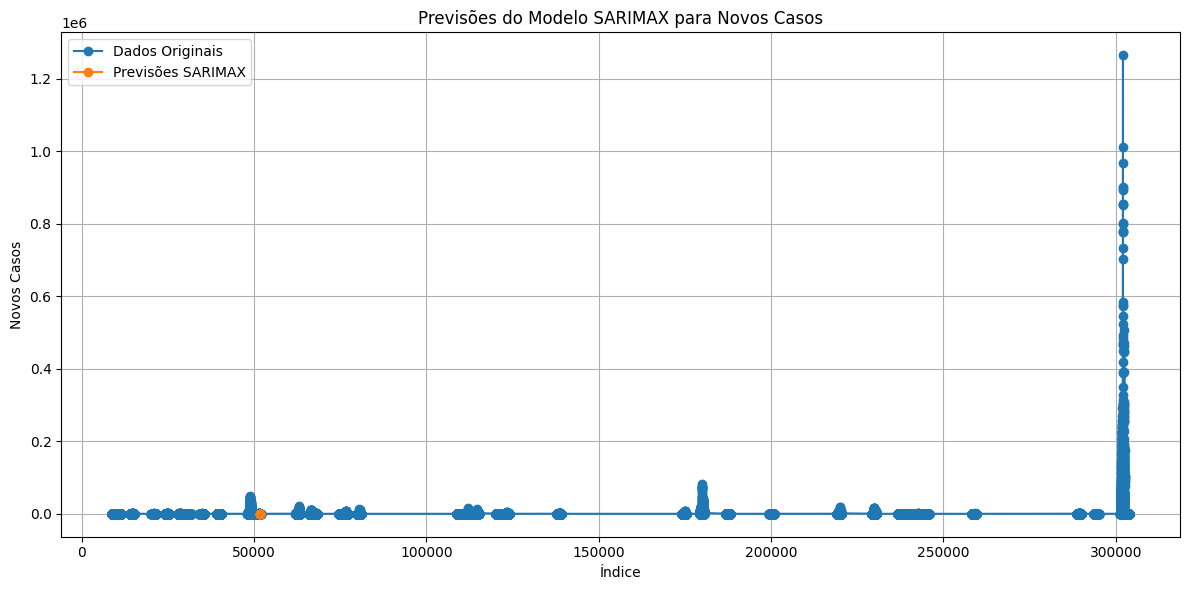

In [ ]:
# Plotar as previsões do modelo SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(indices_originais, dados_originais, label='Dados Originais', marker='o')

# Plotar as previsões do SARIMAX
indices_previsoes_sarimax = range(len(dados_originais), len(dados_originais) + len(previsoes_sarimax))
plt.plot(indices_previsoes_sarimax, previsoes_sarimax, label='Previsões SARIMAX', marker='o')

# Personalizar o gráfico
plt.title('Previsões do Modelo SARIMAX para Novos Casos')
plt.xlabel('Índice')
plt.ylabel('Novos Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


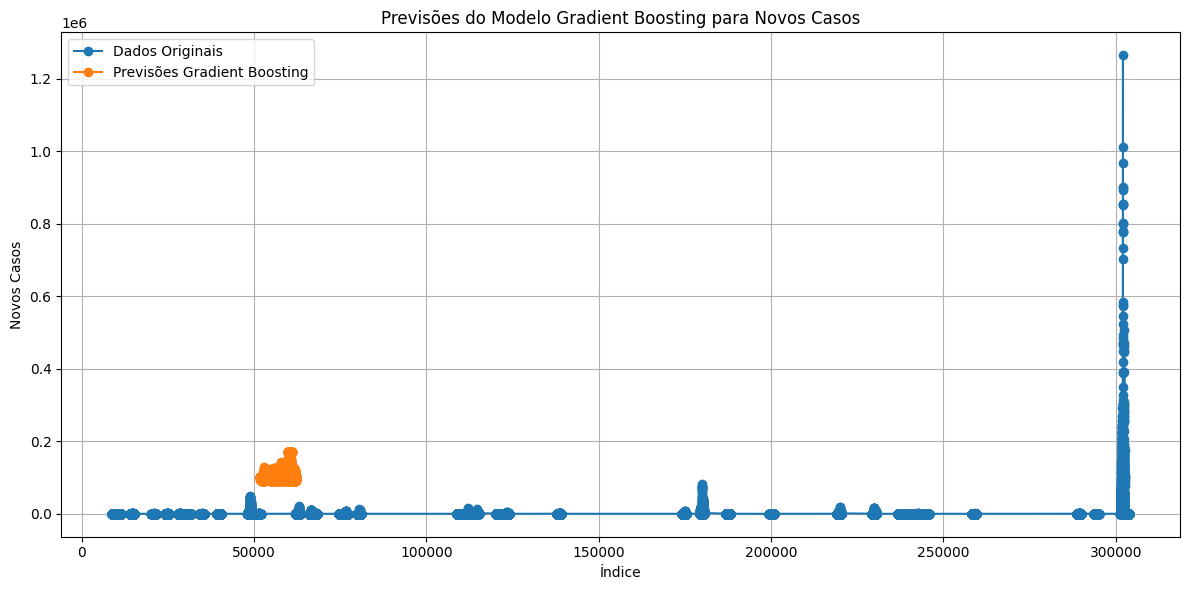

In [ ]:
# Plotar as previsões do modelo Gradient Boosting Regressor
plt.figure(figsize=(12, 6))
plt.plot(indices_originais, dados_originais, label='Dados Originais', marker='o')

# Plotar as previsões do Gradient Boosting Regressor
indices_previsoes_gb = range(len(dados_originais), len(dados_originais) + len(previsoes_gb))
plt.plot(indices_previsoes_gb, previsoes_gb, label='Previsões Gradient Boosting', marker='o')

# Personalizar o gráfico
plt.title('Previsões do Modelo Gradient Boosting para Novos Casos')
plt.xlabel('Índice')
plt.ylabel('Novos Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Certifique-se de que y_test está bem definido
y_test_sarimax = y_test[:len(previsoes_sarimax)]

# Fazer previsões para o conjunto de teste usando o modelo SARIMAX
previsoes_sarimax = resultado.predict(start=len(y_train), end=len(y_train) + len(y_test_sarimax) - 1)

# Certificar-se de que as previsões e y_test_sarimax têm o mesmo tamanho
assert len(previsoes_sarimax) == len(y_test_sarimax), "O comprimento das previsões do SARIMAX não corresponde ao comprimento de y_test_sarimax."


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Certifique-se de que y_test tem o mesmo comprimento para cada previsão
y_test_sarimax = y_test[:len(previsoes_sarimax)]
y_test_gb = y_test[:len(previsoes_gb)]
y_test_rf = y_test[:len(previsoes_rf)]

# Calcular o MAPE para cada modelo
mape_sarimax = mean_absolute_percentage_error(y_test_sarimax, previsoes_sarimax)
mape_gb = mean_absolute_percentage_error(y_test_gb, previsoes_gb)
mape_rf = mean_absolute_percentage_error(y_test_rf, previsoes_rf)

# Exibir os resultados
print(f"MAPE (Erro Percentual Absoluto Médio) - SARIMAX: {mape_sarimax * 100:.2f}%")
print(f"MAPE (Erro Percentual Absoluto Médio) - Gradient Boosting: {mape_gb * 100:.2f}%")
print(f"MAPE (Erro Percentual Absoluto Médio) - Random Forest: {mape_rf * 100:.2f}%")


MAPE (Erro Percentual Absoluto Médio) - SARIMAX: 18199442962648182784.00%
MAPE (Erro Percentual Absoluto Médio) - Gradient Boosting: 18716126076895924060160.00%
MAPE (Erro Percentual Absoluto Médio) - Random Forest: 15950355112310175744.00%


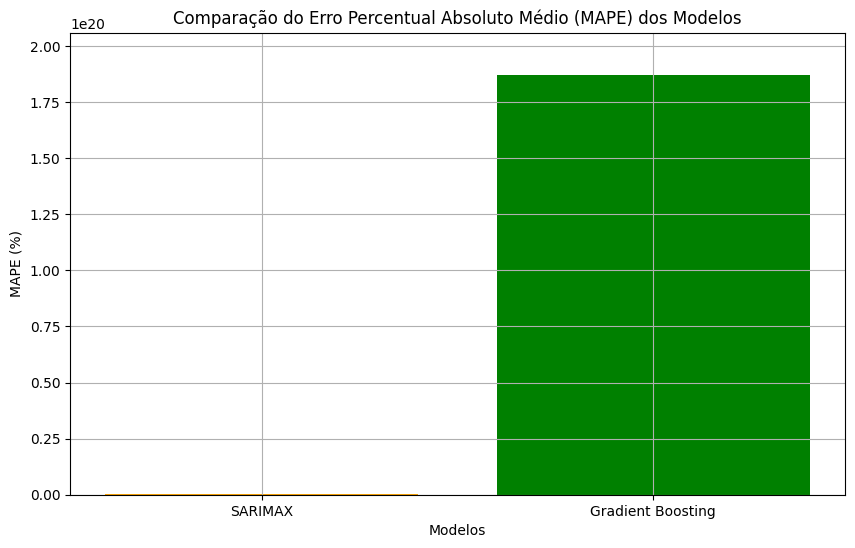

In [ ]:
import matplotlib.pyplot as plt

# Certifique-se de que 'mape_sarimax' e 'mape_gb' estão definidos
# Se ainda houver uma variável 'mape_rf', remova-a da lista de 'mapes'

# Dados para o gráfico
modelos = ['SARIMAX', 'Gradient Boosting']
mapes = [mape_sarimax, mape_gb]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, mapes, color=['orange', 'green'])
plt.title('Comparação do Erro Percentual Absoluto Médio (MAPE) dos Modelos')
plt.xlabel('Modelos')
plt.ylabel('MAPE (%)')
plt.ylim(0, max(mapes) * 1.1)  # Ajustar o limite do eixo Y
plt.grid(True)
plt.show()



# Ajuste o Modelo Gradient Boosting:

In [ ]:
modelo_gb = GradientBoostingRegressor()
modelo_gb.fit(X_train_scaled, y_train)


GradientBoostingRegressor()

In [ ]:
print("Tamanho de y_test:", len(y_test))
print("Tamanho de previsoes_gb:", len(previsoes_gb))


Tamanho de y_test: 62253
Tamanho de previsoes_gb: 10376


In [ ]:
previsoes_gb = modelo_gb.predict(X_test_scaled)


In [ ]:
print("Tamanho de y_test:", len(y_test))
print("Tamanho de previsoes_gb:", len(previsoes_gb))


Tamanho de y_test: 62253
Tamanho de previsoes_gb: 62253


In [ ]:
import numpy as np

# Suponha que y_test, previsoes_sarimax e previsoes_gb sejam definidos anteriormente

# Ajustar y_test e previsoes_sarimax para terem o mesmo comprimento
y_test = y_test[:len(previsoes_sarimax)]
previsoes_gb = previsoes_gb[:len(previsoes_sarimax)]

# Calcular correlação de Pearson para SARIMAX
corr_sarimax = np.corrcoef(y_test, previsoes_sarimax)[0, 1]

# Calcular correlação de Pearson para Gradient Boosting
corr_gb = np.corrcoef(y_test, previsoes_gb)[0, 1]

# Exibir os resultados
print("Coeficiente de Correlação de Pearson:")
print(f"SARIMAX: {corr_sarimax:.4f}")
print(f"Gradient Boosting: {corr_gb:.4f}")



Coeficiente de Correlação de Pearson:
SARIMAX: 0.3147
Gradient Boosting: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
import numpy as np

# Verificar comprimento dos arrays
if len(y_test) != len(previsoes_gb):
    print("Os comprimentos de y_test e previsoes_gb não correspondem.")
    # Realizar ajustes para garantir que ambos tenham o mesmo comprimento
    min_len = min(len(y_test), len(previsoes_gb))
    y_test = y_test[:min_len]
    previsoes_gb = previsoes_gb[:min_len]

# Calcular correlação de Pearson para Gradient Boosting
corr_gb = np.corrcoef(y_test, previsoes_gb)[0, 1]

# Exibir os resultados
print("Coeficiente de Correlação de Pearson:")
print(f"Gradient Boosting: {corr_gb:.4f}")


Valores NaN em y_test: False
Valores NaN em previsoes_gb: False


In [ ]:
import numpy as np

# Verificar se há NaN em y_test
if np.isnan(y_test).any():
    print("Existem valores NaN em y_test. Tratamento necessário.")

# Verificar se há NaN em previsoes_gb
if np.isnan(previsoes_gb).any():
    print("Existem valores NaN em previsoes_gb. Tratamento necessário.")
    # Por exemplo, substituir NaN por 0 ou por outro valor adequado
    previsoes_gb[np.isnan(previsoes_gb)] = 0  # Substitui NaN por 0

# Calcular correlação de Pearson para Gradient Boosting após tratamento de NaN
corr_gb = np.corrcoef(y_test, previsoes_gb)[0, 1]

# Exibir os resultados
print("Coeficiente de Correlação de Pearson:")
print(f"Gradient Boosting: {corr_gb:.4f}")


Coeficiente de Correlação de Pearson:
Gradient Boosting: nan


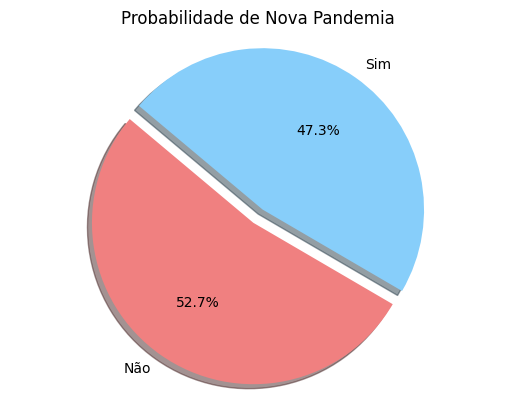

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação de previsões variadas do modelo
# Exemplo de previsões variadas em um range hipotético
predictions = np.random.normal(loc=100000, scale=1000, size=1000)

# Definir um limiar para classificação
threshold = 100000

# Classificar previsões
classified_predictions = np.where(predictions > threshold, 'Sim', 'Não')

# Calcular porcentagens
unique, counts = np.unique(classified_predictions, return_counts=True)
percentages = dict(zip(unique, counts / len(predictions) * 100))

# Criar gráfico de pizza
labels = list(percentages.keys())
sizes = list(percentages.values())
colors = ['lightcoral', 'lightskyblue']
explode = [0.1 if label == 'Sim' else 0 for label in labels]  # Destaque a fatia "Sim"

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo.

plt.title('Probabilidade de Nova Pandemia')
plt.show()
